# Importing the dependencies

In [446]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##### Used 'warnings' module to suppress warnings and keep the output clean

In [448]:
import warnings
warnings.filterwarnings("ignore")

# Data Collection and Processing

In [451]:
loan_dataset = pd.read_csv("loandata.csv")

In [453]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [455]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [457]:
loan_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [459]:
loan_dataset.shape

(614, 13)

In [461]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Checking for Missing Values

In [463]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Removing Missing Values

In [465]:
loan_dataset = loan_dataset.dropna()

In [467]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Replacing the categorical values as this converts the target variable into numerical format required for training the SVM model

In [469]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [471]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [473]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [475]:
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [477]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

#### Visualizing Loan Status by Education Level

<Axes: xlabel='Education', ylabel='count'>

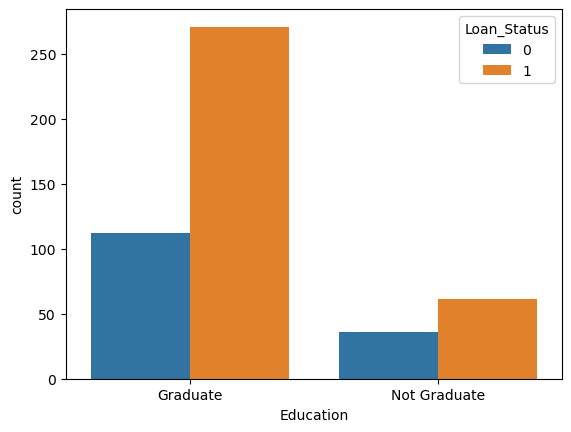

In [479]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

#### Visualizing the Loan Status by Married 

<Axes: xlabel='Married', ylabel='count'>

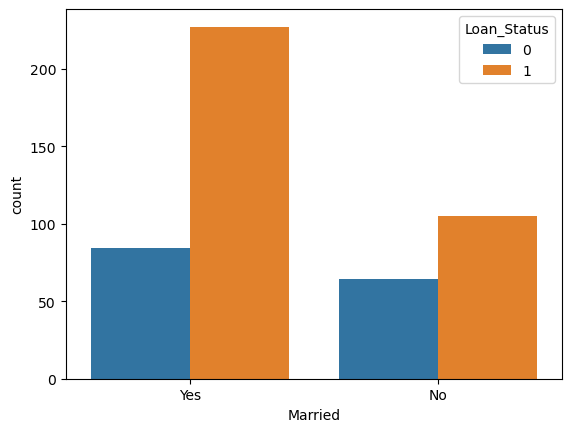

In [481]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [483]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 52.5+ KB


#### Encoding the categorical values into numerical value

In [485]:
loan_dataset.replace({'Gender':{'Male':1,'Female':0},'Married':{'No':0,'Yes':1},'Self_Employed':{'No':0,'Yes':1},'Education':{
    'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [487]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [489]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_dataset['Loan_Status']

In [491]:
print(X)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train Test Split

In [493]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=48)

In [495]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [497]:
classifier = SVC(kernel='linear')

#### Training the Support Vector Machine model

In [499]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

#### Model Evalution

In [501]:
X_train_prediction = classifier.predict(X_train)

In [503]:
X_train_accuracy = accuracy_score(X_train_prediction,y_train)
print("Accuracy on training data",X_train_accuracy)

Accuracy on training data 0.7777777777777778


In [505]:
X_test_prediction = classifier.predict(X_test)

In [507]:
X_test_accuracy = accuracy_score(X_test_prediction,y_test)
print("Accuracy on testing data",X_test_accuracy)

Accuracy on testing data 0.7708333333333334


#### Used to normalize feature data so that all features are on the same scale, which helps improve SVM performance

In [590]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [511]:
scaler = StandardScaler()

In [513]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Define Paramter Grid for Hyperparameter Tuning

In [515]:
param_grid = {
   'C':[0.1,1,10],
    'kernel':['linear','rbf'],
    'gamma':['scale','auto']
}

In [517]:
grid_search = GridSearchCV(SVC(),param_grid,cv=3,scoring='accuracy',n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled,y_train)
print("Best parametes:",grid_search.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parametes: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [519]:
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_scaled,y_train)

SVC(C=0.1, kernel='linear')

#### Model Evalution after doing hyperparamter tuning

In [521]:
train_pred = best_svm.predict(X_train_scaled)
train_accu = accuracy_score(y_train,train_pred)
print("Training accuracy after hyperparamter tunning and standard scaling is:",train_accu)

Training accuracy after hyperparamter tunning and standard scaling is: 0.8078703703703703


In [523]:
test_pred = best_svm.predict(X_test_scaled)
test_accu = accuracy_score(y_test,test_pred)
print("Testing accuracy after hyperparameter tunning and standard scaling is:",test_accu)

Testing accuracy after hyperparameter tunning and standard scaling is: 0.8125


#### Importing libraries for classification report and confusion matrix

In [525]:
from sklearn.metrics import classification_report,confusion_matrix

In [527]:
print("Classification Report")
print(classification_report(y_test,test_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        17
           1       0.78      1.00      0.87        31

    accuracy                           0.81        48
   macro avg       0.89      0.74      0.76        48
weighted avg       0.85      0.81      0.79        48



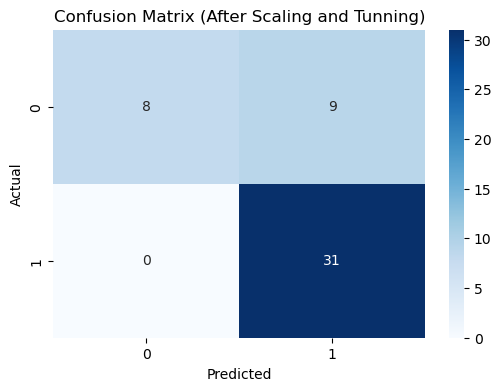

In [531]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test,test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d')
plt.title("Confusion Matrix (After Scaling and Tunning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [537]:
old_train_accu = 0.7778
new_train_accu = 0.7708
new_train_accu = train_accu
new_test_accu = test_accu

# Data Visualization

#### Plotting the graph for comparison of model before tuning and after tuning

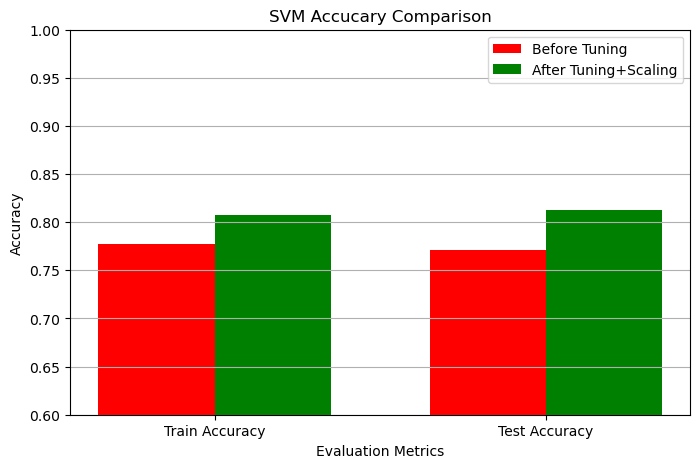

In [539]:
labels = ['Train Accuracy','Test Accuracy']
before = [old_train_accu,old_test_accu]
after = [new_train_accu,new_test_accu]
x = range(len(labels))
width = 0.35
plt.figure(figsize=(8,5))
plt.bar(x,before,width,label="Before Tuning",color='red')
plt.bar([p+width for p in x],after,width,label="After Tuning+Scaling",color='green')
plt.xlabel("Evaluation Metrics")
plt.ylabel("Accuracy")
plt.title("SVM Accucary Comparison")
plt.xticks([p+width/2 for p in x],labels)
plt.ylim([0.6,1.0])
plt.legend()
plt.grid(axis='y')
plt.show()

# Testing the model 

In [553]:
test_input = [[1,1,0,1,0,5000,0.0,128,360,1.0,2]]
scaled_input = scaler.transform(test_input)
prediction = best_svm.predict(scaled_input)
print("Prediction:","Loan Approved"if prediction[0]==1 else "Loan Not Approved")

Prediction: Loan Approved


# Saving the model and scaler using joblib for future 

In [557]:
import joblib

In [559]:
joblib.dump(best_svm,'svm_loan_model.pkl')

['svm_loan_model.pkl']

In [561]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [563]:
print("Model and Scaler saved successfully")

Model and Scaler saved successfully
